In [2]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report

In [3]:
img_size=224 #ResNet50 224x224
batch_size=64

datagen_train = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=10,
    width_shift_range=0.05,
    height_shift_range=0.05,
    zoom_range=0.1,
    channel_shift_range=0.0,
    fill_mode='nearest',
    horizontal_flip=True,
)
train_generator = datagen_train.flow_from_directory(
    "../dataset/facial_recognition_data/train",
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode="sparse", 
    shuffle=True,
    
)

datagen_test = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=10,
    width_shift_range=0.05,
    height_shift_range=0.05,
    zoom_range=0.1,
    channel_shift_range=0.0,
    fill_mode='nearest',
    horizontal_flip=True,
)
test_generator = datagen_test.flow_from_directory(
    "../dataset/facial_recognition_data/test",
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode="sparse",  
    shuffle=True
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


# create the model

In [4]:
base_model=ResNet50(weights="imagenet",include_top=False,input_shape=(224,224,3))

# Add layers
x = base_model.output
x = Flatten()(x)
x = Dense(512,activation="relu")(x)
x = Dense(256,activation="relu")(x)
x = Dense(128,activation="relu")(x)
x = Dense(64,activation="relu")(x)
output = Dense(7,activation="softmax")(x)

# final model
model=Model(inputs=base_model.input,outputs=output)

# Freeze the base model
for layer in base_model.layers:
    layer.trainable=False

model.compile(optimizer=Adam(learning_rate=0.0005),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [5]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_accuracy',  
    factor=0.5,               
    patience=10,               
    verbose=1,                 
    min_delta=0.02, 
)

checkpoint_callback_val = tf.keras.callbacks.ModelCheckpoint(
    'best_model_val_CNN.keras',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

checkpoint_callback_train = tf.keras.callbacks.ModelCheckpoint(
    'best_model_train_CNN.keras',
    monitor='accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

In [6]:
# history = model.fit(
#     train_generator,
#     steps_per_epoch=train_generator.samples // batch_size,
#     epochs=50,
#     validation_data=test_generator,
#     validation_steps=test_generator.samples // batch_size,
#     callbacks=[checkpoint_callback_val,checkpoint_callback_train,reduce_lr],
#     verbose=1
# )

# VGG16

In [12]:
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))


for layer in base_model.layers:
    layer.trainable = False

# Add layers
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation="relu")(x)
x = Dense(256, activation="relu")(x)
x = Dense(128, activation="relu")(x)
x = Dense(64, activation="relu")(x)
output = Dense(7, activation="softmax")(x)

model_vgg = Model(inputs=base_model.input, outputs=output)

model_vgg.compile(optimizer=Adam(learning_rate=0.0005),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [13]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_accuracy',  
    factor=0.5,               
    patience=10,               
    verbose=1,                 
    min_delta=0.02, 
)

checkpoint_callback_val = tf.keras.callbacks.ModelCheckpoint(
    'best_VGG_val.keras',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

checkpoint_callback_train = tf.keras.callbacks.ModelCheckpoint(
    'best_VGG_train.keras',
    monitor='accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

In [14]:
history = model_vgg.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=100,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size,
    callbacks=[checkpoint_callback_val,checkpoint_callback_train,reduce_lr],
    verbose=1
)

Epoch 1/100


c:\Users\fatem\OneDrive\Dokumente\GitHub\ml_repository_mandanizadeh\myenv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3594 - loss: 1.6593
Epoch 1: val_accuracy improved from -inf to 0.46289, saving model to best_VGG_val.keras

Epoch 1: accuracy improved from -inf to 0.41323, saving model to best_VGG_train.keras
448/448 ━━━━━━━━━━━━━━━━━━━━ 1965s 4s/step - accuracy: 0.3595 - loss: 1.6591 - val_accuracy: 0.4629 - val_loss: 1.4001 - learning_rate: 5.0000e-04
Epoch 2/100
  1/448 ━━━━━━━━━━━━━━━━━━━━ 20:28 3s/step - accuracy: 0.4531 - loss: 1.4823

C:\Users\fatem\AppData\Local\Programs\Python\Python39\lib\contextlib.py:137: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: val_accuracy improved from 0.46289 to 0.50000, saving model to best_VGG_val.keras

Epoch 2: accuracy improved from 0.41323 to 0.45312, saving model to best_VGG_train.keras
448/448 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.4531 - loss: 1.4823 - val_accuracy: 0.5000 - val_loss: 1.3132 - learning_rate: 5.0000e-04
Epoch 3/100
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.4715 - loss: 1.3715
Epoch 3: val_accuracy did not improve from 0.50000

Epoch 3: accuracy improved from 0.45312 to 0.47774, saving model to best_VGG_train.keras
448/448 ━━━━━━━━━━━━━━━━━━━━ 4437s 10s/step - accuracy: 0.4715 - loss: 1.3715 - val_accuracy: 0.4805 - val_loss: 1.3412 - learning_rate: 5.0000e-04
Epoch 4/100
  1/448 ━━━━━━━━━━━━━━━━━━━━ 20:12 3s/step - accuracy: 0.4062 - loss: 1.5280
Epoch 4: val_accuracy improved from 0.50000 to 0.70000, saving model to best_VGG_val.keras

Epoch 4: accuracy did not improve from 0.47774
448/448 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4062 - loss: 1.

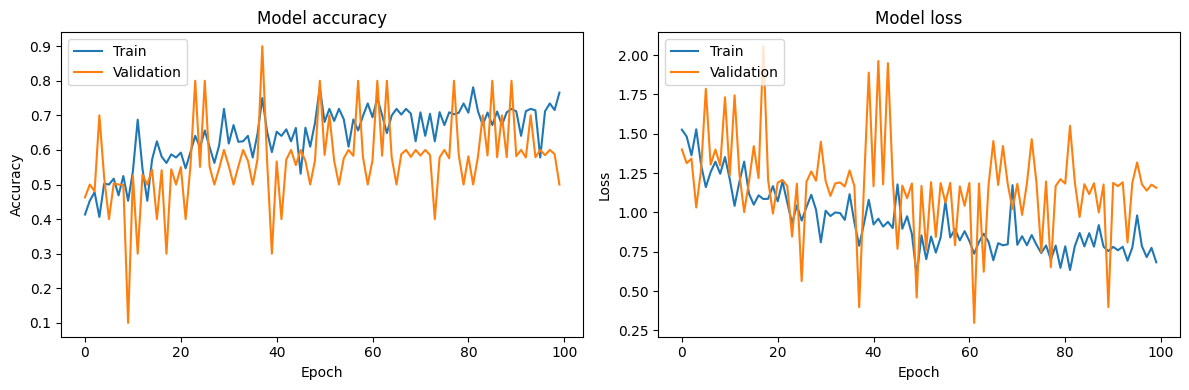

In [17]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()